In [17]:
url = ('https://raw.githubusercontent.com/jakevdp/''bicycle-data/main/FremontBridge.csv')
!cd ../data && curl -O {url}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4585k  100 4585k    0     0   666k      0  0:00:06  0:00:06 --:--:--  841k     0   582k      0  0:00:07  0:00:05  0:00:02  645k


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [19]:
data = pd.read_csv('../data/FremontBridge.csv', index_col='Date', parse_dates=True)

/tmp/ipykernel_4219/3301310143.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('../data/FremontBridge.csv', index_col='Date', parse_dates=True)


In [20]:
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [21]:
# Let's shorten column names for convenience 
data.columns = ['Total', 'East', 'West']

# describe data
data.dropna().describe()

,Total,East,West
count,147255.000000,147255.000000,147255.000000
mean,110.341462,50.077763,60.263699
std,140.422051,64.634038,87.252147
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,145.000000,68.000000,74.000000
max,1097.000000,698.000000,850.000000


### Visualizing the Data

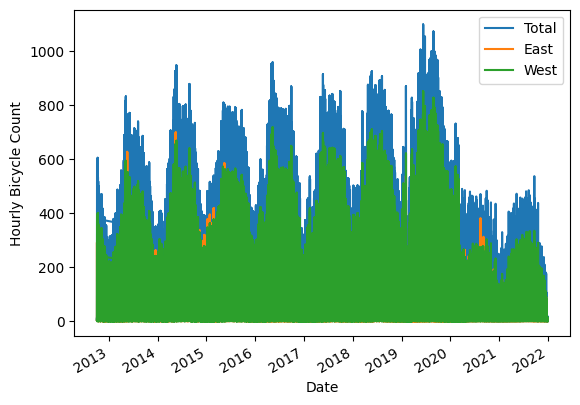

In [22]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

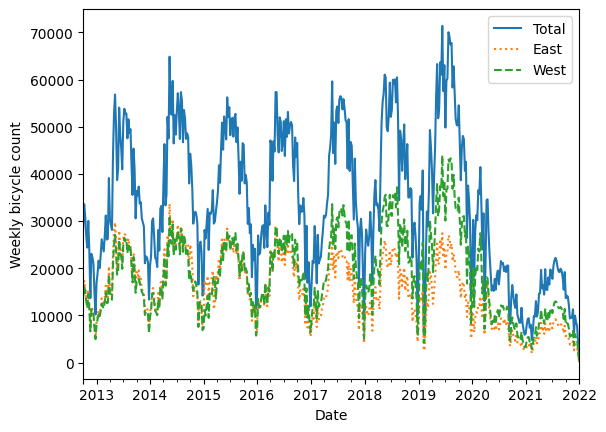

In [23]:
weekly = data.resample('W').sum()
weekly.plot(style=['-', ':', '--'])
plt.ylabel('Weekly bicycle count');

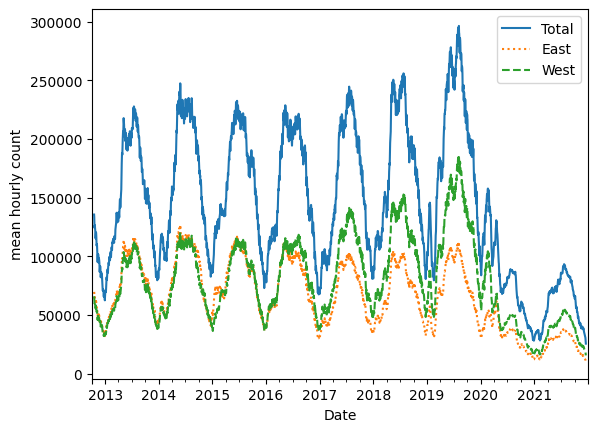

In [24]:
#Sum Hours by the day
daily = data.resample('D').sum()
#roll through days 
daily.rolling(30, center=True).sum().plot(style=['-', ':', '--'])

# Idk why:
plt.ylabel('mean hourly count');

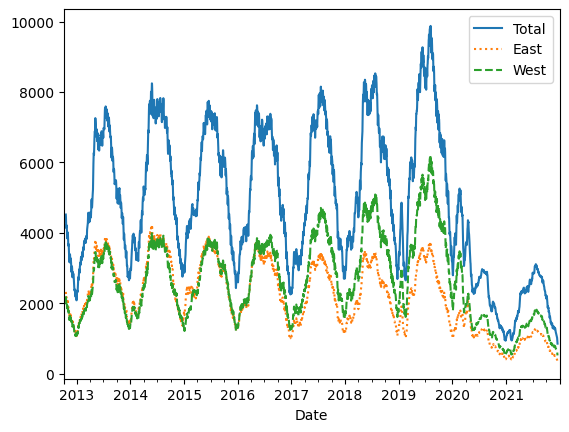

In [25]:
view = data.resample('D').sum()
view = (view.rolling(30, center=True).mean()).plot(style=['-', ':', '--']);

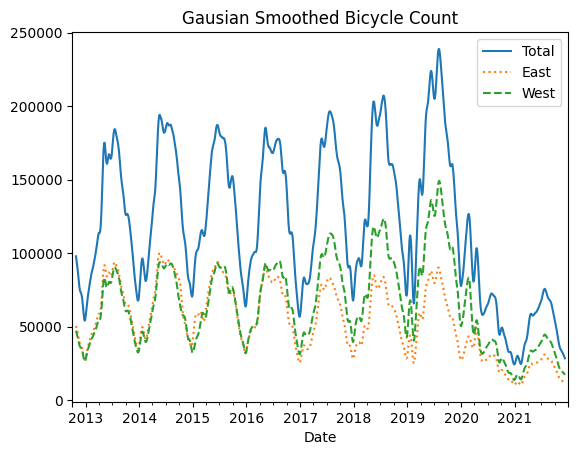

In [42]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=['-', ':', '--'], title = 'Gausian Smoothed Bicycle Count');

### Digging into the Data

> Average Hourly Bicycle Count

<Axes: title={'center': 'Average Hourly Bicycle count'}, xlabel='time'>

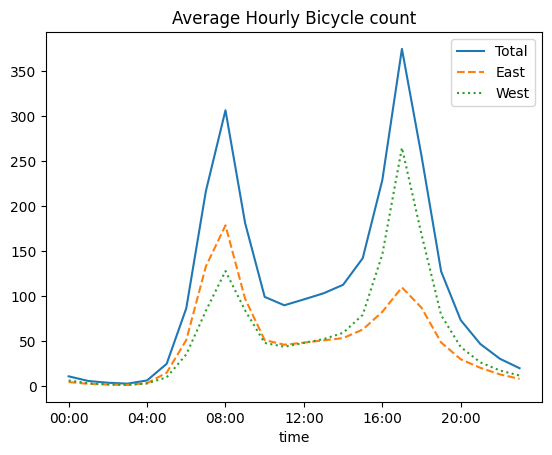

In [41]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=['-', '--', ':'], title = 'Average Hourly Bicycle Count')

> Change Based on Days of the Week

<Axes: title={'center': 'Average Daily Bicycle Count'}>

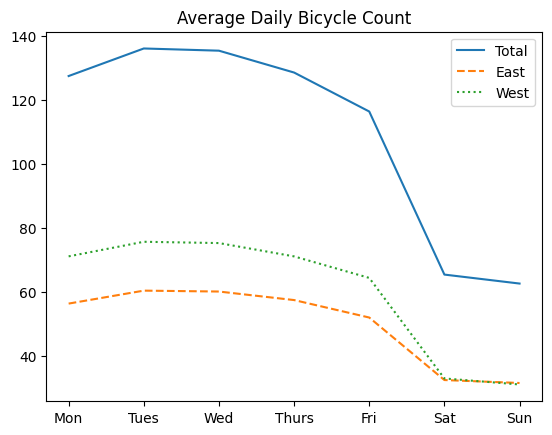

In [ ]:
by_weekday = data.groupby(data.index.dayofweek).mean() #use sum() to see the day with the highest frequency
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=['-', '--', ':'], title = 'Average Daily Bicycle Count') 

> Notice that we have more riders crossing the bridge on weekdays compared to weekends.<br>
    using `matplotlib` let's view the hourly trends of weekdays and weekends side by side 

In [ ]:
np.where?

<Axes: title={'center': 'Weekdends'}, xlabel='time'>

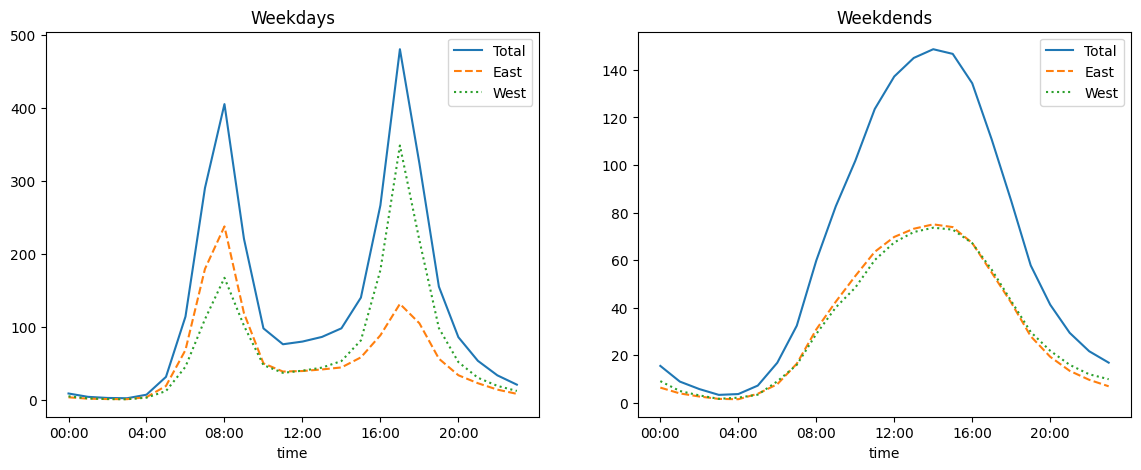

In [75]:
# Grouping by flags marking the Weekday, Weekend and the time of the day
# data.query('index.dt.weekday > 5') to view weekend entries
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')

by_time = data.groupby([weekend, data.index.time]).mean()

# Using matplotlib to visualize plots
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

by_time.loc['Weekday'].plot(ax=ax[0], xticks=hourly_ticks, title='Weekdays', style=['-', '--', ':'])

by_time.loc['Weekend'].plot(ax=ax[1], xticks=hourly_ticks, title='Weekends', style=['-', '--', ':'])

> Weekday: bimodal commuting pattern<br>
> Weekend: unimodal recreational pattern